In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir('/Users/graciepearsall/Elkhorn-Slough-EC/YMA/eddy-pro-files/20211203')

In [65]:
full = pd.read_csv('eddypro_out_full_output_2021-12-07T150428_exp.csv')
full.columns=full.iloc[0]
print(list(full.iloc[1]))

[nan, '[yyyy-mm-dd]', '[HH:MM]', '[ddd.ddd]', '[1=daytime]', '[#]', '[#]', '[kg+1m-1s-2]', '[#]', '[W+1m-2]', '[#]', '[W+1m-2]', '[#]', '[µmol+1s-1m-2]', '[#]', '[mmol+1s-1m-2]', '[#]', '[µmol+1s-1m-2]', '[#]', '[W+1m-2]', '[W+1m-2]', '[µmol+1s-1m-2]', '[mmol+1s-1m-2]', '[µmol+1s-1m-2]', '[µmol+1s-1m-2]', '[mmol+1s-1m-2]', '[µmol+1s-1m-2]', '[mmol+1m-3]', '[µmol+1mol_a-1]', '[µmol+1mol_d-1]', '[s]', '[1=default]', '[mmol+1m-3]', '[mmol+1mol_a-1]', '[mmol+1mol_d-1]', '[s]', '[1=default]', '[mmol+1m-3]', '[µmol+1mol_a-1]', '[µmol+1mol_d-1]', '[s]', '[1=default]', '[K]', '[K]', '[Pa]', '[kg+1m-3]', '[J+1kg-1K-1]', '[m+3mol-1]', '[mm+1hour-1]', '[kg+1m-3]', '[Pa]', '[Pa]', '[kg+1kg-1]', '[%]', '[Pa]', '[K]', '[m+1s-1]', '[m+1s-1]', '[m+1s-1]', '[m+1s-1]', '[m+1s-1]', '[m+1s-1]', '[m+1s-1]', '[m+1s-1]', '[deg_from_north]', '[deg]', '[deg]', '[deg]', '[m+1s-1]', '[m+2s-2]', '[m]', '[#]', '[#]', '[K]', '[0=KJ/1=KM/2=HS]', '[m]', '[m]', '[m]', '[m]', '[m]', '[m]', '[m]', '[kg+1m-1s-2]', '[#]',

In [11]:
full.drop([0,1], inplace=True)

In [12]:
full.head()

,filename,date,time,DOY,daytime,file_records,used_records,Tau,qc_Tau,H,...,ch4_var,w/ts_cov,w/co2_cov,w/h2o_cov,w/ch4_cov,air_t_mean,air_p_mean,co2_signal_strength_7500_mean,rssi_77_mean,NaN
2,2021-11-10T060000_smart3-00551.ghg,2021-11-10,06:30,314.2707,0,36000,36000,0.543957E-04,1,-2.57444,...,0.248602E-06,-0.346576E-03,0.132282E-03,0.727053E-02,-0.120596E-06,298.143,101802.,89.7511,66.8853,NaN
3,2021-11-10T063000_smart3-00551.ghg,2021-11-10,07:00,314.2916,0,36000,36000,-0.138483E-04,1,-0.376458E-01,...,0.613504E-06,-0.187719E-04,-0.106161E-04,-0.201667E-02,-0.879995E-06,298.220,101806.,89.7534,63.5893,NaN
4,2021-11-10T070000_smart3-00551.ghg,2021-11-10,07:30,314.3124,1,36000,36000,0.186176E-04,1,0.167901E-01,...,0.583990E-07,0.130403E-04,-0.188488E-06,0.562638E-03,-0.144386E-06,298.132,101820.,89.7527,66.9142,NaN
5,2021-11-10T073000_smart3-00551.ghg,2021-11-10,08:00,314.3332,1,36000,36000,0.109248E-03,1,0.136937,...,0.974156E-07,0.108343E-03,0.214053E-03,0.346955E-02,0.770826E-06,298.288,101841.,89.7543,66.8749,NaN
6,2021-11-10T080000_smart3-00551.ghg,2021-11-10,08:30,314.3541,1,36000,36000,0.292829E-04,1,0.517697,...,0.642671E-07,0.393339E-03,-0.160333E-03,-0.303092E-02,-0.362780E-06,298.779,101867.,89.7602,67.0304,NaN


In [30]:
out = pd.read_csv('eddypro_out_fluxnet_2021-12-07T150428_exp.csv')
out.head()

,TIMESTAMP_START,TIMESTAMP_END,DOY_START,DOY_END,FILENAME_HF,SW_IN_POT,NIGHT,EXPECT_NR,FILE_NR,CUSTOM_FILTER_NR,...,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_NONE,HPATH_GA_NONE,VPATH_GA_NONE,RESPONSE_TIME_GA_NONE,NUM_CUSTOM_VARS,CUSTOM_AIR_T_MEAN,CUSTOM_AIR_P_MEAN,CUSTOM_CO2_SIGNAL_STRENGTH_7500_MEAN,CUSTOM_RSSI_77_MEAN,NUM_BIOMET_VARS
0,202111100600,202111100630,314.2499,314.2707,2021-11-10T060000_smart3-00551.ghg,0.0000,1,36000,36000,36000,...,-9999,-9999.0,-9999.0,-9999.0,4.0,298.143,101802.0,89.7511,66.8853,0.0
1,202111100630,202111100700,314.2707,314.2916,2021-11-10T063000_smart3-00551.ghg,0.0000,1,36000,36000,36000,...,-9999,-9999.0,-9999.0,-9999.0,4.0,298.220,101806.0,89.7534,63.5893,0.0
2,202111100700,202111100730,314.2916,314.3124,2021-11-10T070000_smart3-00551.ghg,44.8216,0,36000,36000,36000,...,-9999,-9999.0,-9999.0,-9999.0,4.0,298.132,101820.0,89.7527,66.9142,0.0
3,202111100730,202111100800,314.3124,314.3332,2021-11-10T073000_smart3-00551.ghg,153.7010,0,36000,36000,36000,...,-9999,-9999.0,-9999.0,-9999.0,4.0,298.288,101841.0,89.7543,66.8749,0.0
4,202111100800,202111100830,314.3332,314.3541,2021-11-10T080000_smart3-00551.ghg,277.8050,0,36000,36000,36000,...,-9999,-9999.0,-9999.0,-9999.0,4.0,298.779,101867.0,89.7602,67.0304,0.0


In [41]:
out.TIMESTAMP_START = pd.to_datetime(out.TIMESTAMP_START, format='%Y%m%d%H%M')
cols = list(out.columns)
cols

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'DOY_START',
 'DOY_END',
 'FILENAME_HF',
 'SW_IN_POT',
 'NIGHT',
 'EXPECT_NR',
 'FILE_NR',
 'CUSTOM_FILTER_NR',
 'WD_FILTER_NR',
 'SONIC_NR',
 'T_SONIC_NR',
 'CO2_NR',
 'H2O_NR',
 'CH4_NR',
 'NONE_NR',
 'TAU_NR',
 'H_NR',
 'FC_NR',
 'LE_NR',
 'FCH4_NR',
 'FNONE_NR',
 'TAU',
 'H',
 'LE',
 'ET',
 'FC',
 'FH2O',
 'FCH4',
 'FNONE',
 'TAU_RANDUNC_HF',
 'H_RANDUNC_HF',
 'LE_RANDUNC_HF',
 'ET_RANDUNC_HF',
 'FC_RANDUNC_HF',
 'FH2O_RANDUNC_HF',
 'FCH4_RANDUNC_HF',
 'FNONE_RANDUNC_HF',
 'SH_SINGLE',
 'SLE_SINGLE',
 'SET_SINGLE',
 'SC_SINGLE',
 'SH2O_SINGLE',
 'SCH4_SINGLE',
 'SNONE_SINGLE',
 'FC_VADV',
 'FH2O_VADV',
 'FCH4_VADV',
 'FNONE_VADV',
 'U_UNROT',
 'V_UNROT',
 'W_UNROT',
 'U',
 'V',
 'W',
 'WS',
 'WS_MAX',
 'WD',
 'WD_SIGMA',
 'USTAR',
 'TKE',
 'MO_LENGTH',
 'ZL',
 'BOWEN',
 'TSTAR',
 'T_SONIC',
 'TA_EP',
 'PA_EP',
 'RH_EP',
 'AIR_MV',
 'AIR_DENSITY',
 'AIR_RHO_CP',
 'AIR_CP',
 'VAPOR_DENSITY',
 'VAPOR_PARTIAL_PRESSURE',
 'VAPOR_PARTIAL_PRESSURE_SA

In [58]:
import numpy as np
out.replace(-9999.0, np.nan, inplace=True)
out.head()

,TIMESTAMP_START,TIMESTAMP_END,DOY_START,DOY_END,FILENAME_HF,SW_IN_POT,NIGHT,EXPECT_NR,FILE_NR,CUSTOM_FILTER_NR,...,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_NONE,HPATH_GA_NONE,VPATH_GA_NONE,RESPONSE_TIME_GA_NONE,NUM_CUSTOM_VARS,CUSTOM_AIR_T_MEAN,CUSTOM_AIR_P_MEAN,CUSTOM_CO2_SIGNAL_STRENGTH_7500_MEAN,CUSTOM_RSSI_77_MEAN,NUM_BIOMET_VARS
0,2021-11-10 06:00:00,202111100630,314.2499,314.2707,2021-11-10T060000_smart3-00551.ghg,0.0000,1,36000.0,36000.0,36000.0,...,NaN,NaN,NaN,NaN,4.0,298.143,101802.0,89.7511,66.8853,0.0
1,2021-11-10 06:30:00,202111100700,314.2707,314.2916,2021-11-10T063000_smart3-00551.ghg,0.0000,1,36000.0,36000.0,36000.0,...,NaN,NaN,NaN,NaN,4.0,298.220,101806.0,89.7534,63.5893,0.0
2,2021-11-10 07:00:00,202111100730,314.2916,314.3124,2021-11-10T070000_smart3-00551.ghg,44.8216,0,36000.0,36000.0,36000.0,...,NaN,NaN,NaN,NaN,4.0,298.132,101820.0,89.7527,66.9142,0.0
3,2021-11-10 07:30:00,202111100800,314.3124,314.3332,2021-11-10T073000_smart3-00551.ghg,153.7010,0,36000.0,36000.0,36000.0,...,NaN,NaN,NaN,NaN,4.0,298.288,101841.0,89.7543,66.8749,0.0
4,2021-11-10 08:00:00,202111100830,314.3332,314.3541,2021-11-10T080000_smart3-00551.ghg,277.8050,0,36000.0,36000.0,36000.0,...,NaN,NaN,NaN,NaN,4.0,298.779,101867.0,89.7602,67.0304,0.0


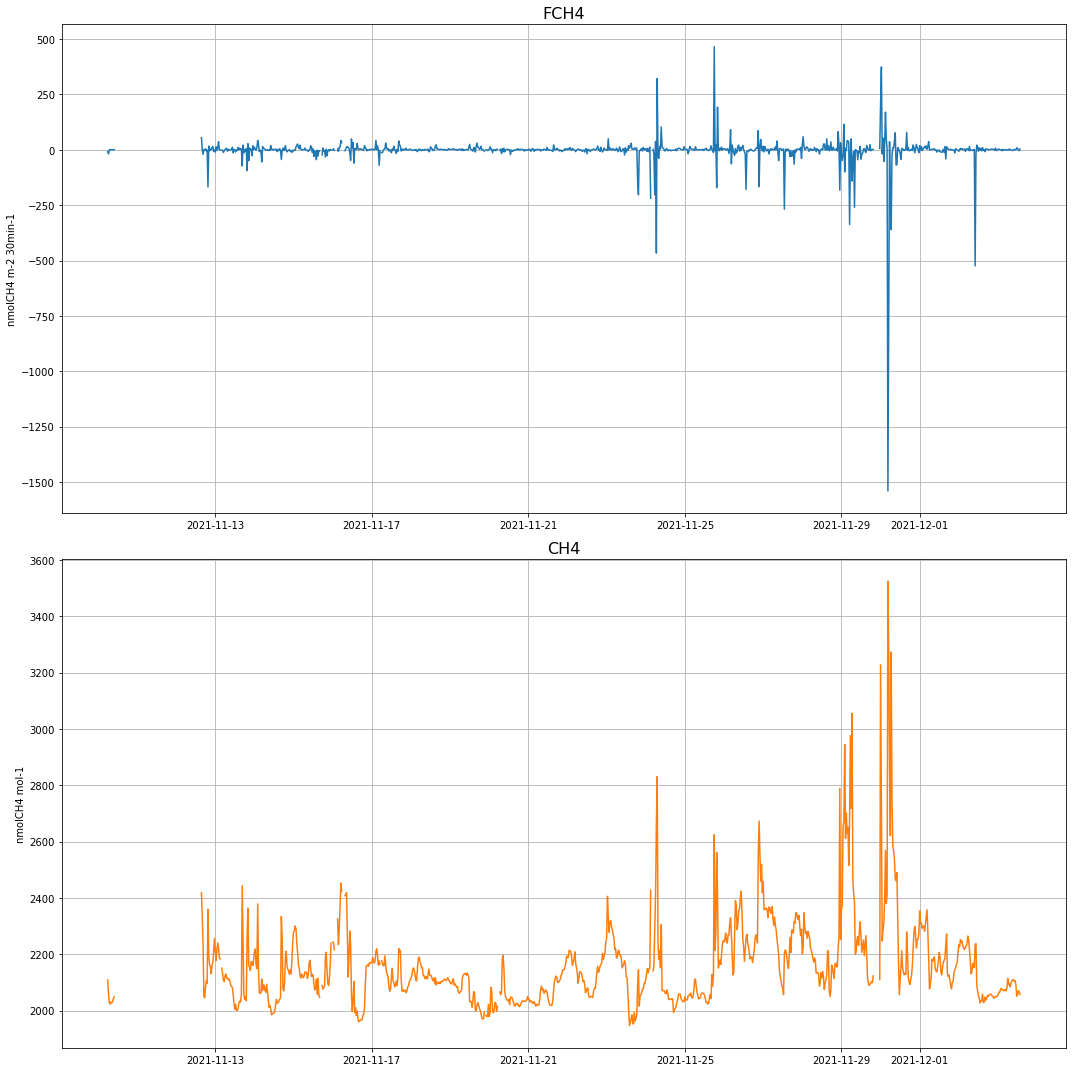

In [81]:
fig, ax= plt.subplots(2, figsize=(15,15))
ax1 = ax[0]
ax2 = ax[1]

ax1.plot(out.TIMESTAMP_START, out.FCH4)
ax1.set_ylabel('nmolCH4 m-2 30min-1')
ax1.set_title('FCH4', fontsize=16)
ax1.grid()

ax2.plot(out.TIMESTAMP_START, out.CH4, color='tab:orange')
ax2.set_title('CH4', fontsize=16)
ax2.set_ylabel('nmolCH4 mol-1')
ax2.grid()

plt.tight_layout()
plt.savefig('CH4_YMA_20211203.png', dpi=400)

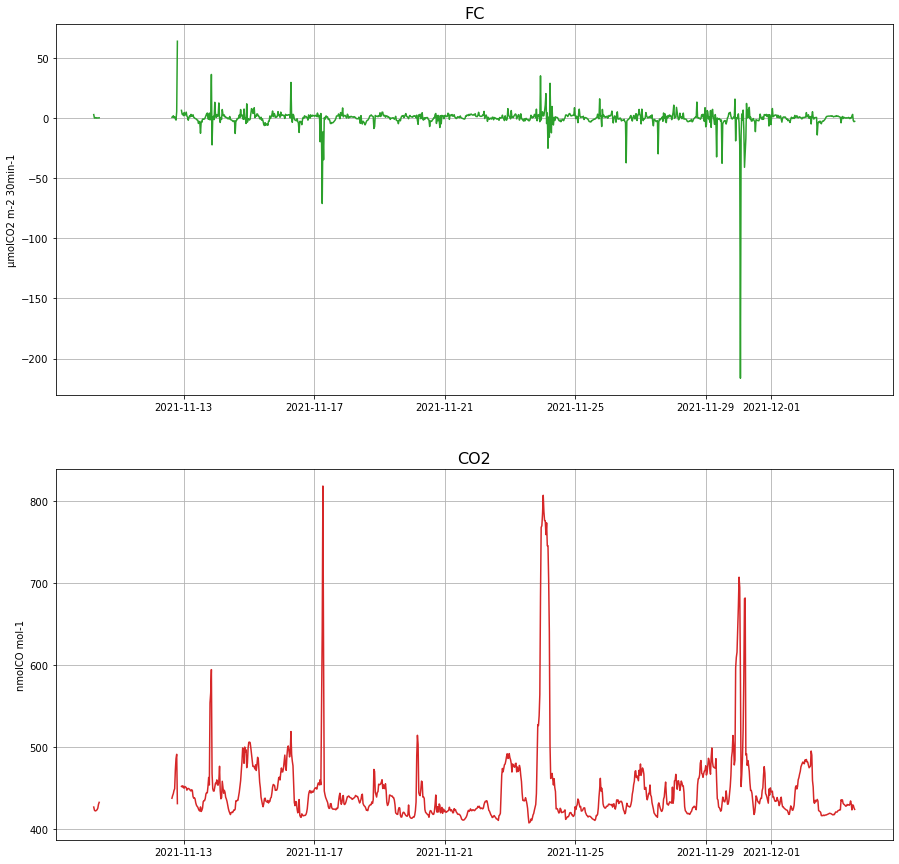

In [82]:
fig, ax= plt.subplots(2, figsize=(15,15))
ax1 = ax[0]
ax2 = ax[1]

ax1.plot(out.TIMESTAMP_START, out.FC, color='tab:green')
ax1.set_ylabel('µmolCO2 m-2 30min-1')
ax1.set_title('FC', fontsize=16)
ax1.grid()

ax2.plot(out.TIMESTAMP_START, out.CO2, color='tab:red')
ax2.set_title('CO2', fontsize=16)
ax2.set_ylabel('nmolCO mol-1')
ax2.grid()
plt.savefig('CO2_YMA_20211203.png', dpi=400)

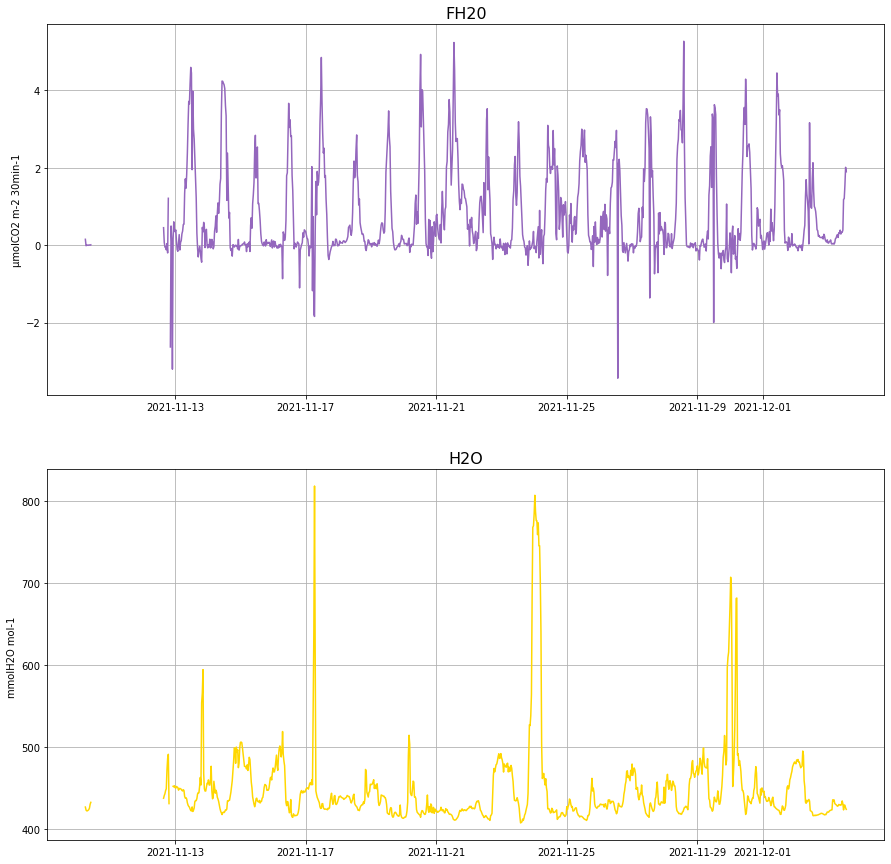

In [84]:
fig, ax= plt.subplots(2, figsize=(15,15))
ax1 = ax[0]
ax2 = ax[1]

ax1.plot(out.TIMESTAMP_START, out.FH2O, color='tab:purple')
ax1.set_ylabel('µmolCO2 m-2 30min-1')
ax1.set_title('FH20', fontsize=16)
ax1.grid()

ax2.plot(out.TIMESTAMP_START, out.CO2, color='gold')
ax2.set_title('H2O', fontsize=16)
ax2.set_ylabel('mmolH2O mol-1 ')

ax2.grid()

plt.savefig('H2O_YMA_20211203.png', dpi=400)